# Primera Entrega ------ " eleccion de datasets potenciales"
Hola!

elegi esta data set "heart attack prediction",es un data set que recopila mas de 8500 registros en 26 campos distintos. en este data se recopilan datos de pacientes con cierta disponibilidades cardiacas.

estos pacientes presentan ciertas caracteristicas que los predisponen a tener un mayor riesgo de sufrir un paro cardiaco.

vamos a querer realizar un modelo predictivo, en donde podramos ver a travez de un sistema de puntos que personas cuentan con mas riesgo de sufrir un ataque cardiaco.

----------------------------

los factores de riesgo que se miden en este data set son:

*  colesterol
*  presion sanguinea
*  diabetes
*  fumador
*  obesidad
*  consumo de alcohol
*  colesterol
*  presion sanguinea
*  trigliceridos (en valores altos aumenta el riesgo de sufrir enfermedades cardiacas/cerebrovasculares)

tambien se tienen en cuenta otros factores que pueden mejorar o empeorar su predisposicion cardiaca como por ejemplo..:

*  edad
*  sexo
*  cantidad de ejercicio semanal 
*  cantidad de sedentarismo (horas por dia)
*  horas de sueño por dia
*  dieta
*  problema cardiaco anterior (antesedente)
*  uso de medicacion
*  nivel de stress
*  indice de masa muscular (BMI)


por otro lado se realiza una clasificacion por zona geofrafica

*  pais
*  continente
*  hemisferio (norte,sur)

... a continuacion vamos a trabajar un poco nuestros datos...

fuente: 

fuente: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset?select=heart_attack_prediction_dataset.csv

In [1]:
import pandas as pd
import numpy as np
import re 
import os
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.style.use("bmh")
# Para forwad selection
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import plot_tree
from statsmodels.api import OLS
import statsmodels.api as sm


In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
url = "https://raw.githubusercontent.com/Masciotra1/Curso-DataScience-Coder/main/heart_attack_prediction_dataset.csv"
df = pd.read_csv(url, index_col=0, )
df.head(5)


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,...,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,...,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,...,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,...,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,...,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
ruta = r"C:\\Users\\Lean\\Downloads"
os.chdir(ruta)
# URL del archivo CSV
df = pd.read_csv("heart_attack_prediction_dataset.csv" , sep=",")

In [5]:
print(df.columns)


Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


# Solo nos vamos a quedar con las Variables que consideramos que nos van a servir para nuestro analisis.

In [6]:
ComumnasFiltradas = ['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Smoking',
      'Obesity', 'Alcohol Consumption', 'Diet',
      'Previous Heart Problems', 'Stress Level',
      'BMI', 
      'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
      'Continent', 'Hemisphere', 'Heart Attack Risk']

df = df[ComumnasFiltradas]

# creamos una variable ID que va a remplazar a nuestra anterior ID  

In [7]:
df['ID'] = range(1, len(df) + 1)


In [8]:
# Establecer la columna 'ID' como índice y eliminarla de las columnas
df.set_index('ID', inplace=True)

# analisamos nuestras variables y observamos que no tenemos datos nulos ni vacios

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 1 to 8763
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Diet                             8763 non-null   object 
 10  Previous Heart Problems          8763 non-null   int64  
 11  Stress Level                     8763 non-null   int64  
 12  BMI                 

In [10]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(8763, 19)


In [11]:
print(df.isnull().sum())

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Diet                               0
Previous Heart Problems            0
Stress Level                       0
BMI                                0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [12]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Stress Level,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00
mean,53.71,259.88,75.02,0.65,0.90,0.50,0.60,0.50,5.47,28.89,3.49,7.02,0.36
std,21.25,80.86,20.55,0.48,0.30,0.50,0.49,0.50,2.86,6.32,2.28,1.99,0.48
min,18.00,120.00,40.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.00,4.00,0.00
25%,35.00,192.00,57.00,0.00,1.00,0.00,0.00,0.00,3.00,23.42,2.00,5.00,0.00
50%,54.00,259.00,75.00,1.00,1.00,1.00,1.00,0.00,5.00,28.77,3.00,7.00,0.00
75%,72.00,330.00,93.00,1.00,1.00,1.00,1.00,1.00,8.00,34.32,5.00,9.00,1.00
max,90.00,400.00,110.00,1.00,1.00,1.00,1.00,1.00,10.00,40.00,7.00,10.00,1.00


# nuestras variables estan compuestas por 3 clases de datos distintos. 
* Numericas
* Categoricas
* Booleanas (0 y 1)


# Voy a renombrar mis variables

In [13]:
TraduccionColumnas = {"Age": "Edad", 

                    "Sex": "Sexo", 

                    "Cholesterol": "Colesterol",

                    "Blood Pressure":"Presion Sanguinea",

                    'Heart Rate':"Pulso",

                    'Diabetes':"Diabetes",

                    'Smoking':"Fumador",
                      
                    "Obesity":"Obesidad",

                    'Alcohol Consumption':"Consumo de Alcohol",
                    
                    'Diet':"Dieta",

                    'Previous Heart Problems':"Antecedentes Cardiacos",
               
                    'Stress Level':"Nivel de Stress",

                    'BMI':"BMI",

                    'Physical Activity Days Per Week':"Actividad Fisica/Semana",

                    'Sleep Hours Per Day':"Horas de descanso",
                     
                    'Country':"Pais",

                    'Continent':"Continente",

                    'Hemisphere':"Hemisferio",

                    'Heart Attack Risk':"Riesgo Cardiaco",

                    'ID':"ID"}

In [14]:
df = df.rename(columns=TraduccionColumnas)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 1 to 8763
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     8763 non-null   int64  
 1   Sexo                     8763 non-null   object 
 2   Colesterol               8763 non-null   int64  
 3   Presion Sanguinea        8763 non-null   object 
 4   Pulso                    8763 non-null   int64  
 5   Diabetes                 8763 non-null   int64  
 6   Fumador                  8763 non-null   int64  
 7   Obesidad                 8763 non-null   int64  
 8   Consumo de Alcohol       8763 non-null   int64  
 9   Dieta                    8763 non-null   object 
 10  Antecedentes Cardiacos   8763 non-null   int64  
 11  Nivel de Stress          8763 non-null   int64  
 12  BMI                      8763 non-null   float64
 13  Actividad Fisica/Semana  8763 non-null   int64  
 14  Horas de descanso       

In [15]:
df.head(5)

,Edad,Sexo,Colesterol,Presion Sanguinea,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Dieta,Antecedentes Cardiacos,Nivel de Stress,BMI,Actividad Fisica/Semana,Horas de descanso,Pais,Continente,Hemisferio,Riesgo Cardiaco
ID,,,,,,,,,,,,,,,,,,,
1,67,Male,208,158/88,72,0,1,0,0,Average,0,9,31.25,0,6,Argentina,South America,Southern Hemisphere,0
2,21,Male,389,165/93,98,1,1,1,1,Unhealthy,1,1,27.19,1,7,Canada,North America,Northern Hemisphere,0
3,21,Female,324,174/99,72,1,0,0,0,Healthy,1,9,28.18,4,4,France,Europe,Northern Hemisphere,0
4,84,Male,383,163/100,73,1,1,0,1,Average,1,9,36.46,3,4,Canada,North America,Northern Hemisphere,0
5,66,Male,318,91/88,93,1,1,1,0,Unhealthy,1,6,21.81,1,5,Thailand,Asia,Northern Hemisphere,0


# vamos a renombrar algunas de nuestras filas y columnas

In [16]:
# de sexo renombramos Male y Female

In [17]:
import pandas as pd

# Supongamos que df es tu DataFrame con la columna 'sexo'
# df = pd.read_csv("tu_archivo.csv")

# Renombrar los valores en la columna 'sexo'
df['Sexo'] = df['Sexo'].replace({'Male': 'Hombres', 'Female': 'Mujeres'})

# Mostrar el DataFrame actualizado
df

,Edad,Sexo,Colesterol,Presion Sanguinea,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Dieta,Antecedentes Cardiacos,Nivel de Stress,BMI,Actividad Fisica/Semana,Horas de descanso,Pais,Continente,Hemisferio,Riesgo Cardiaco
ID,,,,,,,,,,,,,,,,,,,
1,67,Hombres,208,158/88,72,0,1,0,0,Average,0,9,31.25,0,6,Argentina,South America,Southern Hemisphere,0
2,21,Hombres,389,165/93,98,1,1,1,1,Unhealthy,1,1,27.19,1,7,Canada,North America,Northern Hemisphere,0
3,21,Mujeres,324,174/99,72,1,0,0,0,Healthy,1,9,28.18,4,4,France,Europe,Northern Hemisphere,0
4,84,Hombres,383,163/100,73,1,1,0,1,Average,1,9,36.46,3,4,Canada,North America,Northern Hemisphere,0
5,66,Hombres,318,91/88,93,1,1,1,0,Unhealthy,1,6,21.81,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,60,Hombres,121,94/76,61,1,1,0,1,Healthy,1,8,19.66,7,7,Thailand,Asia,Northern Hemisphere,0
8760,28,Mujeres,120,157/102,73,1,0,1,0,Healthy,0,8,23.99,4,9,Canada,North America,Northern Hemisphere,0
8761,47,Hombres,250,161/75,105,0,1,1,1,Average,1,5,35.41,4,4,Brazil,South America,Southern Hemisphere,1


In [18]:
# renombramos las filas de Dieta por: Promedio, Poco Saludable y Saludable

In [19]:
# Supongamos que df es tu DataFrame con la columna 'Dieta'
# df = pd.read_csv("tu_archivo.csv")

# Renombrar los valores en la columna 'Dieta'
df['Dieta'] = df['Dieta'].replace({'Average': 'Promedio', 'Unhealthy': 'Poco Saludable', 'Healthy': 'Saludable'})

# Mostrar el DataFrame actualizado
df

,Edad,Sexo,Colesterol,Presion Sanguinea,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Dieta,Antecedentes Cardiacos,Nivel de Stress,BMI,Actividad Fisica/Semana,Horas de descanso,Pais,Continente,Hemisferio,Riesgo Cardiaco
ID,,,,,,,,,,,,,,,,,,,
1,67,Hombres,208,158/88,72,0,1,0,0,Promedio,0,9,31.25,0,6,Argentina,South America,Southern Hemisphere,0
2,21,Hombres,389,165/93,98,1,1,1,1,Poco Saludable,1,1,27.19,1,7,Canada,North America,Northern Hemisphere,0
3,21,Mujeres,324,174/99,72,1,0,0,0,Saludable,1,9,28.18,4,4,France,Europe,Northern Hemisphere,0
4,84,Hombres,383,163/100,73,1,1,0,1,Promedio,1,9,36.46,3,4,Canada,North America,Northern Hemisphere,0
5,66,Hombres,318,91/88,93,1,1,1,0,Poco Saludable,1,6,21.81,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,60,Hombres,121,94/76,61,1,1,0,1,Saludable,1,8,19.66,7,7,Thailand,Asia,Northern Hemisphere,0
8760,28,Mujeres,120,157/102,73,1,0,1,0,Saludable,0,8,23.99,4,9,Canada,North America,Northern Hemisphere,0
8761,47,Hombres,250,161/75,105,0,1,1,1,Promedio,1,5,35.41,4,4,Brazil,South America,Southern Hemisphere,1


In [20]:
#renombramos las filas de continente

In [21]:
# Renombrar los valores en la columna 'Continente'
df['Continente'] = df['Continente'].replace({'South America': 'America del Sur', 'North America': 'America del Norte', 'Europe': 'Europa'})

# Mostrar el DataFrame actualizado
df

,Edad,Sexo,Colesterol,Presion Sanguinea,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Dieta,Antecedentes Cardiacos,Nivel de Stress,BMI,Actividad Fisica/Semana,Horas de descanso,Pais,Continente,Hemisferio,Riesgo Cardiaco
ID,,,,,,,,,,,,,,,,,,,
1,67,Hombres,208,158/88,72,0,1,0,0,Promedio,0,9,31.25,0,6,Argentina,America del Sur,Southern Hemisphere,0
2,21,Hombres,389,165/93,98,1,1,1,1,Poco Saludable,1,1,27.19,1,7,Canada,America del Norte,Northern Hemisphere,0
3,21,Mujeres,324,174/99,72,1,0,0,0,Saludable,1,9,28.18,4,4,France,Europa,Northern Hemisphere,0
4,84,Hombres,383,163/100,73,1,1,0,1,Promedio,1,9,36.46,3,4,Canada,America del Norte,Northern Hemisphere,0
5,66,Hombres,318,91/88,93,1,1,1,0,Poco Saludable,1,6,21.81,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,60,Hombres,121,94/76,61,1,1,0,1,Saludable,1,8,19.66,7,7,Thailand,Asia,Northern Hemisphere,0
8760,28,Mujeres,120,157/102,73,1,0,1,0,Saludable,0,8,23.99,4,9,Canada,America del Norte,Northern Hemisphere,0
8761,47,Hombres,250,161/75,105,0,1,1,1,Promedio,1,5,35.41,4,4,Brazil,America del Sur,Southern Hemisphere,1


In [22]:
# renombramos las filas de Hemisferio..

In [23]:
# Renombrar los valores en la columna 'Hemisferio'
df['Hemisferio'] = df['Hemisferio'].replace({'Southern Hemisphere': 'Hemisferio Sur', 'Northern Hemisphere': 'Hemisferio Norte'})

# Mostrar el DataFrame actualizado
df

,Edad,Sexo,Colesterol,Presion Sanguinea,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Dieta,Antecedentes Cardiacos,Nivel de Stress,BMI,Actividad Fisica/Semana,Horas de descanso,Pais,Continente,Hemisferio,Riesgo Cardiaco
ID,,,,,,,,,,,,,,,,,,,
1,67,Hombres,208,158/88,72,0,1,0,0,Promedio,0,9,31.25,0,6,Argentina,America del Sur,Hemisferio Sur,0
2,21,Hombres,389,165/93,98,1,1,1,1,Poco Saludable,1,1,27.19,1,7,Canada,America del Norte,Hemisferio Norte,0
3,21,Mujeres,324,174/99,72,1,0,0,0,Saludable,1,9,28.18,4,4,France,Europa,Hemisferio Norte,0
4,84,Hombres,383,163/100,73,1,1,0,1,Promedio,1,9,36.46,3,4,Canada,America del Norte,Hemisferio Norte,0
5,66,Hombres,318,91/88,93,1,1,1,0,Poco Saludable,1,6,21.81,1,5,Thailand,Asia,Hemisferio Norte,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,60,Hombres,121,94/76,61,1,1,0,1,Saludable,1,8,19.66,7,7,Thailand,Asia,Hemisferio Norte,0
8760,28,Mujeres,120,157/102,73,1,0,1,0,Saludable,0,8,23.99,4,9,Canada,America del Norte,Hemisferio Norte,0
8761,47,Hombres,250,161/75,105,0,1,1,1,Promedio,1,5,35.41,4,4,Brazil,America del Sur,Hemisferio Sur,1


# vamos a generar nuevas nuevas variables partiendo de otras

# Presion Sanguinea.

In [24]:
# vamos a dividir la columna Presion Sanguinea en dos variables nuevas. " Presion sistolica y diastolica"

In [25]:
# Dividir la columna de presión sanguínea en presión sistólica y diastólica
df[['Presion_Sistolica', 'Presion_Diastolica']] = df['Presion Sanguinea'].str.split('/', expand=True).astype(int)


# Agrupamos Diabetes - Fumador - Obesidad - C alcohol - Ant Cardiacos

In [26]:
# vamos a crear una variable nueva que nos permita agrupar las siguientes variables que son de tipo booleano a una nueva que sea numerica. 
#entendemos que esto nos va a permitir realizar nuevos analisis que se van a desprender de esta nueva variable : 
 #5   Diabetes                   
 #6   Fumador                    
 #7   Obesidad                    
 #8   Consumo de Alcohol         
#10  Antecedentes Cardiacos

In [27]:
# Crear la nueva columna 'CondicionesPreexistentes'
df['CondicionesPreexistentes'] = df[['Diabetes', 'Fumador', 'Obesidad', 'Consumo de Alcohol', 'Antecedentes Cardiacos']].sum(axis=1)

# Mostrar el DataFrame actualizado
df

,Edad,Sexo,Colesterol,Presion Sanguinea,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Dieta,...,BMI,Actividad Fisica/Semana,Horas de descanso,Pais,Continente,Hemisferio,Riesgo Cardiaco,Presion_Sistolica,Presion_Diastolica,CondicionesPreexistentes
ID,,,,,,,,,,,,,,,,,,,,,
1,67,Hombres,208,158/88,72,0,1,0,0,Promedio,...,31.25,0,6,Argentina,America del Sur,Hemisferio Sur,0,158,88,1
2,21,Hombres,389,165/93,98,1,1,1,1,Poco Saludable,...,27.19,1,7,Canada,America del Norte,Hemisferio Norte,0,165,93,5
3,21,Mujeres,324,174/99,72,1,0,0,0,Saludable,...,28.18,4,4,France,Europa,Hemisferio Norte,0,174,99,2
4,84,Hombres,383,163/100,73,1,1,0,1,Promedio,...,36.46,3,4,Canada,America del Norte,Hemisferio Norte,0,163,100,4
5,66,Hombres,318,91/88,93,1,1,1,0,Poco Saludable,...,21.81,1,5,Thailand,Asia,Hemisferio Norte,0,91,88,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,60,Hombres,121,94/76,61,1,1,0,1,Saludable,...,19.66,7,7,Thailand,Asia,Hemisferio Norte,0,94,76,4
8760,28,Mujeres,120,157/102,73,1,0,1,0,Saludable,...,23.99,4,9,Canada,America del Norte,Hemisferio Norte,0,157,102,2
8761,47,Hombres,250,161/75,105,0,1,1,1,Promedio,...,35.41,4,4,Brazil,America del Sur,Hemisferio Sur,1,161,75,4


# Segunda entrega. ------Práctica integradora: Visualizaciones en Python----
graficos: objetivo de esta entrega realizar 3 graficos con libreria matplot y 3 graficos con libreria seaborn.. con sus respetivos comentarios explicando lo que se quiere analizar. vamos a analizar distintos graficos en busqueda de patrones que nos permita analizar variables que nos resulte util ver.

# EDAD

De la variable edad podemos observar que la distribucion es homogenia en todos sus edades. en el grafico no observamos que la distribucion sea disforme.

<Axes: xlabel='Edad', ylabel='Probability'>

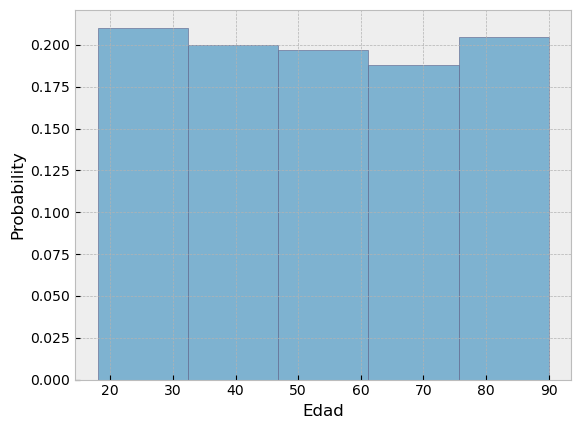

In [28]:
plt.figure()
sns.histplot(data = df,
             x = 'Edad',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 5)

# SEXO

De esta variable podemos ver a simple vista que las mujeres triplican a la cantidad de hombres. podemos decir a simple vista que las mujeres son mas propensas a sufrir un ataque cardiaco que los hombres.

In [29]:
# que cantidad son hombres y que cantidad son mujeres?                        

print(df["Sexo"].value_counts())

# Contar la cantidad de hombres y mujeres
conteo_sexos = df['Sexo'].value_counts()

# Calcular el porcentaje en relación con el total
porcentaje_hombres = (conteo_sexos['Hombres'] / len(df)) * 100
porcentaje_mujeres = (conteo_sexos['Mujeres'] / len(df)) * 100

# Imprimir los resultados
print(f"Porcentaje de Hombres: {porcentaje_hombres:.2f}%")
print(f"Porcentaje de Mujeres: {porcentaje_mujeres:.2f}%")


Hombres    6111
Mujeres    2652
Name: Sexo, dtype: int64
Porcentaje de Hombres: 69.74%
Porcentaje de Mujeres: 30.26%


C:\Users\Lean\AppData\Local\Temp\ipykernel_10880\2764669605.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


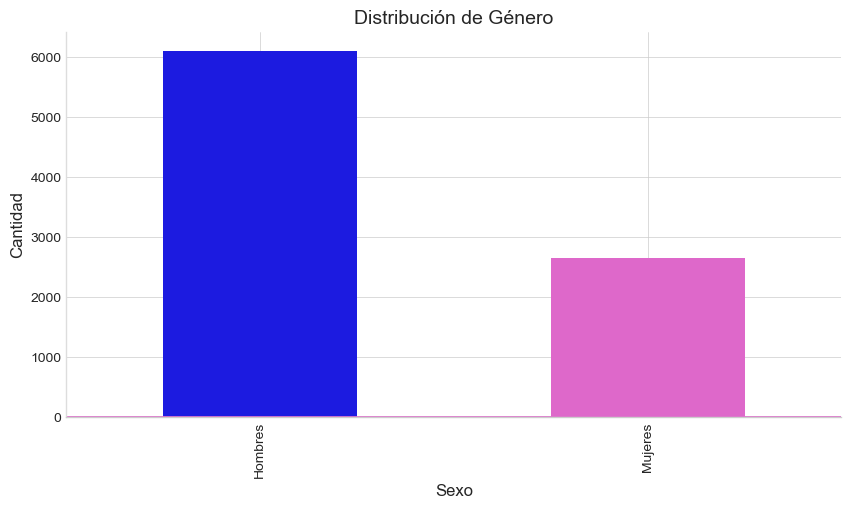

In [30]:

# Calcular la frecuencia de cada valor en la columna 'Sex'
conteo_sex = df['Sexo'].value_counts()

# Utilizar un estilo de gráfico más limpio y minimalista
plt.style.use('seaborn-whitegrid')

# Elegir una paleta de colores más suave y agradable
colors = ['#1C1BE0', '#DE68CA']  # Verde para Male, Rosa suave para Female

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
ax = conteo_sex.plot(kind='bar', color=colors)

# Personalizar el gráfico
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Género', fontsize=14)

# Añadir un poco más de espacio entre las etiquetas y los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Eliminar la línea del eje y (porque estamos usando un fondo blanco)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#dddddd')

# Añadir una línea horizontal a través del eje y
plt.axhline(y=0, color='#DE68CA', linestyle='-')

plt.savefig("GraficoSexo.jpeg")

# Mostrar el gráfico
plt.show()

# COLESTEROL

De esta variable se desprende que un poco mas de la mitad  de nuestra muestra estan por encima de los valores normales  de 240 

In [31]:
# Filtrar personas con colesterol por encima de 240
personas_altos_colesterol = df[df['Colesterol'] > 240]

# Contar la cantidad de personas
cantidad_personas_altos_colesterol = len(personas_altos_colesterol)

# Imprimir el resultado
print(f"Cantidad de personas con colesterol por encima de 240: {cantidad_personas_altos_colesterol}")

Cantidad de personas con colesterol por encima de 240: 5018


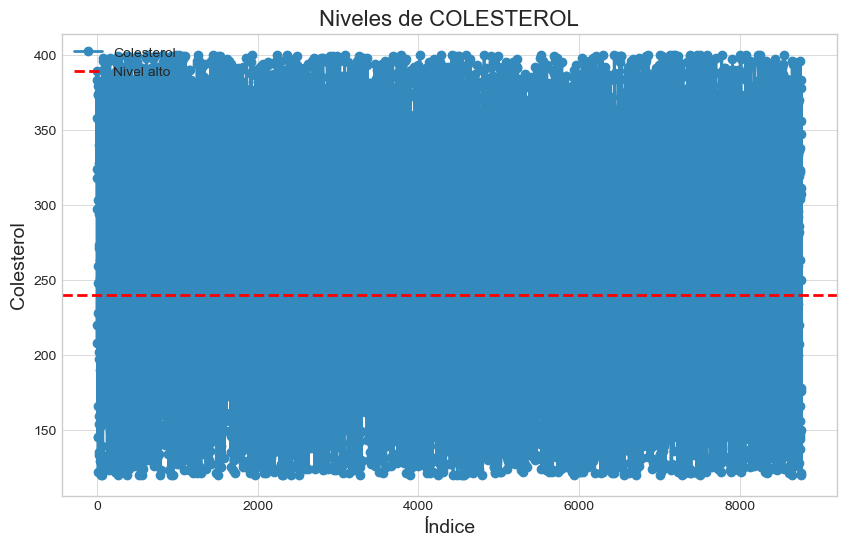

In [32]:
# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de línea
plt.plot(df['Colesterol'], label='Colesterol', marker='o')

# Añadir una línea horizontal en y=240
plt.axhline(y=240, color='r', linestyle='--', label='Nivel alto')

# Personalizar el gráfico
plt.xlabel('Índice', fontsize=14)
plt.ylabel('Colesterol', fontsize=14)
plt.title('Niveles de COLESTEROL', fontsize=16)
plt.legend()

# Mostrar el gráfico
plt.show()

# PRESION SANGUINEA (Presion sistolica y presion diastolica)

In [33]:
# Filtrar los datos para obtener los hipertensos
hipertensos = df[(df['Presion_Sistolica'] >= 140) & (df['Presion_Diastolica'] >= 90)]

# Calcular la cantidad de hipertensos
cantidad_hipertensos = len(hipertensos)

# Calcular el porcentaje de hipertensos respecto al total
porcentaje_hipertensos = (cantidad_hipertensos / len(df)) * 100

print(f"Cantidad de Hipertensos: {cantidad_hipertensos}")
print(f"Porcentaje de Hipertensos respecto al total: {porcentaje_hipertensos:.2f}%")

Cantidad de Hipertensos: 1685
Porcentaje de Hipertensos respecto al total: 19.23%


C:\Users\Lean\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


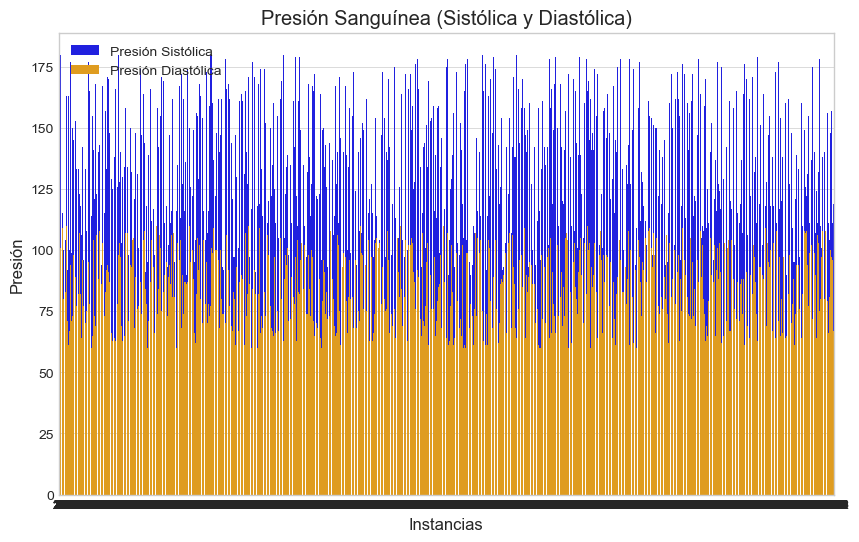

In [34]:
# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='Presion_Sistolica', data=df, color='blue', label='Presión Sistólica')
sns.barplot(x=df.index, y='Presion_Diastolica', data=df, color='orange', label='Presión Diastólica')

# Personalizar el gráfico
plt.title('Presión Sanguínea (Sistólica y Diastólica)')
plt.xlabel('Instancias')
plt.ylabel('Presión')
plt.legend()
plt.show()

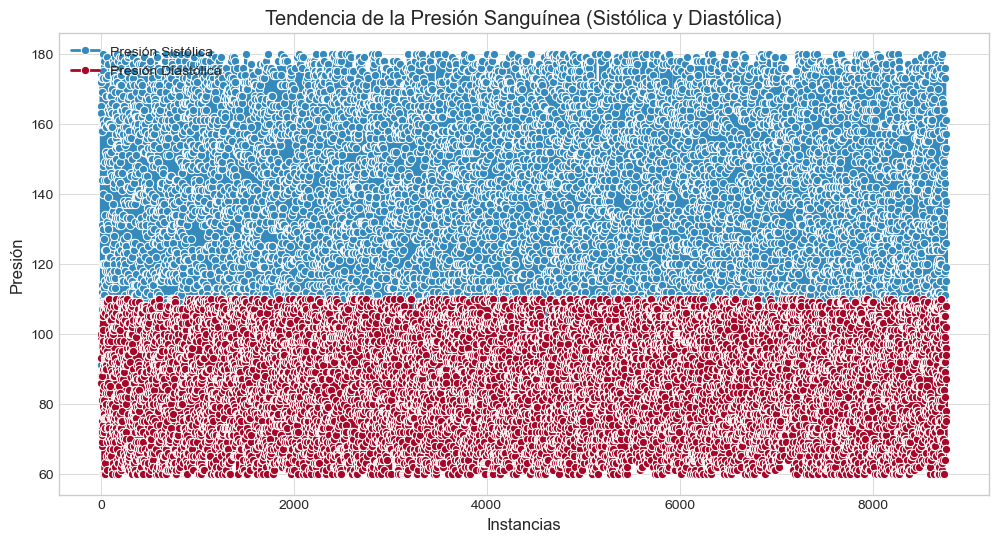

In [35]:

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))

# Línea para la presión sistólica
sns.lineplot(x=df.index, y='Presion_Sistolica', data=df, label='Presión Sistólica', marker='o')

# Línea para la presión diastólica
sns.lineplot(x=df.index, y='Presion_Diastolica', data=df, label='Presión Diastólica', marker='o')

# Personalizar el gráfico
plt.title('Tendencia de la Presión Sanguínea (Sistólica y Diastólica)')
plt.xlabel('Instancias')
plt.ylabel('Presión')
plt.legend()
plt.show()

# PULSO

De este grafico se desprende que la mayoria de los pacientes se encuetran con tendencia a tener mas pulso bajo que alto.
los valores normales se situan entre 60 a 100



In [36]:
# Definir los umbrales
umbral_alto = 100
umbral_bajo = 60

# Filtrar las personas por encima del umbral alto y por debajo del umbral bajo
ritmo_alto = df[df['Pulso'] > umbral_alto]
ritmo_bajo = df[df['Pulso'] < umbral_bajo]

# Calcular la cantidad y porcentaje de personas por encima del umbral alto
cantidad_ritmo_alto = len(ritmo_alto)
porcentaje_ritmo_alto = (cantidad_ritmo_alto / len(df)) * 100

# Calcular la cantidad y porcentaje de personas por debajo del umbral bajo
cantidad_ritmo_bajo = len(ritmo_bajo)
porcentaje_ritmo_bajo = (cantidad_ritmo_bajo / len(df)) * 100

print(f"Cantidad de Personas con Ritmo Cardíaco por Encima del Umbral Alto: {cantidad_ritmo_alto}")
print(f"Porcentaje de Personas con Ritmo Cardíaco por Encima del Umbral Alto: {porcentaje_ritmo_alto:.2f}%")

print(f"\nCantidad de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: {cantidad_ritmo_bajo}")
print(f"Porcentaje de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: {porcentaje_ritmo_bajo:.2f}%")

Cantidad de Personas con Ritmo Cardíaco por Encima del Umbral Alto: 1234
Porcentaje de Personas con Ritmo Cardíaco por Encima del Umbral Alto: 14.08%

Cantidad de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: 2489
Porcentaje de Personas con Ritmo Cardíaco por Debajo del Umbral Bajo: 28.40%


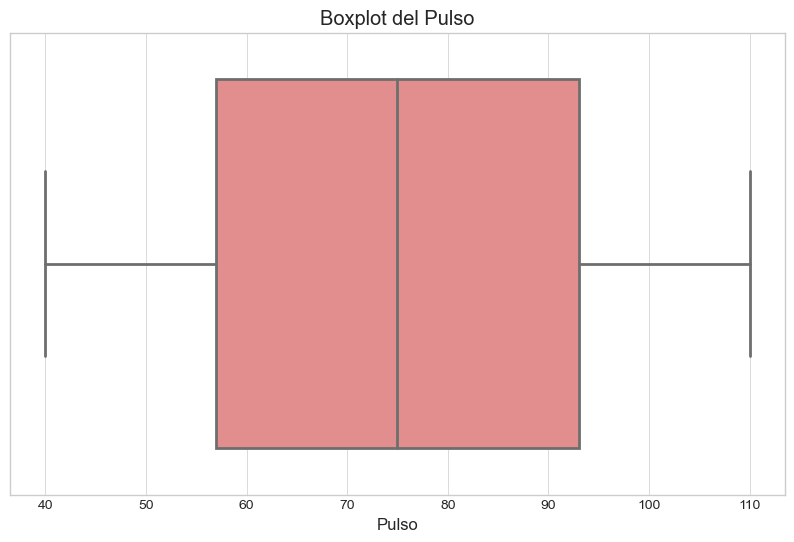

In [37]:
# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Pulso'], color='lightcoral')
plt.title('Boxplot del Pulso')
plt.xlabel('Pulso')
plt.show()

# DIABETES

la relacion de los que tienen Diabetes es de casi 2 a 1

In [38]:
# cuantos son diabeticos

print(df["Diabetes"].value_counts())

1    5716
0    3047
Name: Diabetes, dtype: int64


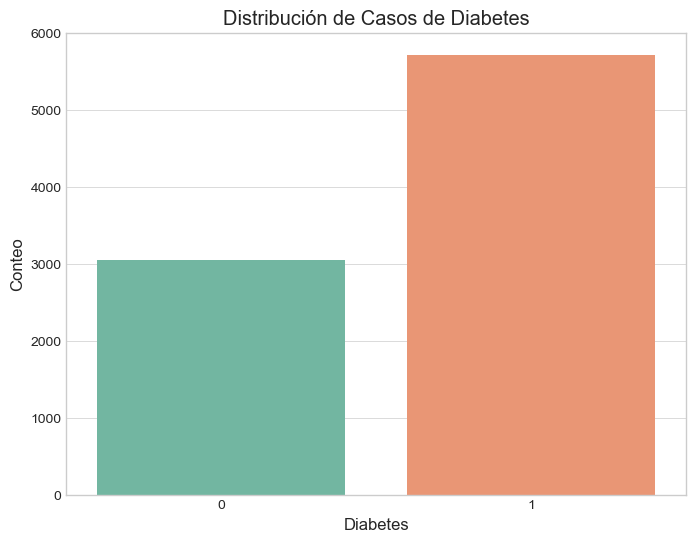

In [39]:

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes', data=df, palette='Set2')
plt.title('Distribución de Casos de Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Conteo')
plt.show()

# FUMADOR

en este grafico podemos ver que casi el 90% son fumadores.

In [40]:
print(df["Fumador"].value_counts())

1    7859
0     904
Name: Fumador, dtype: int64


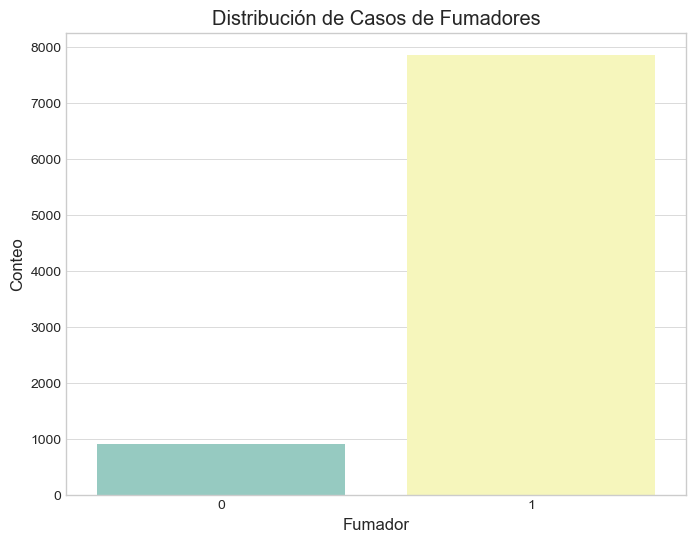

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fumador', data=df, palette='Set3')
plt.title('Distribución de Casos de Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Conteo')
plt.show()

# OBESIDAD

la distribucion de la obesidad es pareja.

In [42]:
print(df["Obesidad"].value_counts())

1    4394
0    4369
Name: Obesidad, dtype: int64


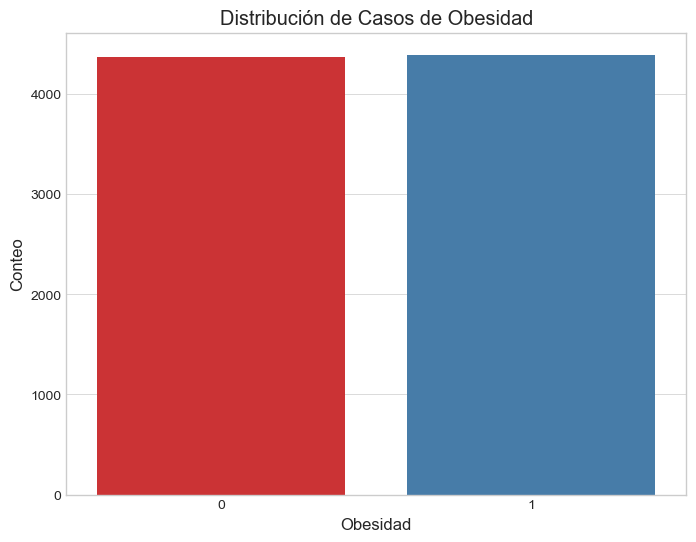

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Obesidad', data=df, palette='Set1')
plt.title('Distribución de Casos de Obesidad')
plt.xlabel('Obesidad')
plt.ylabel('Conteo')
plt.show()

# CONSUMO DE ALCOHOL

los que consumen alcohol son casi un 40% mas que los que no consumen.

In [44]:
print(df["Consumo de Alcohol"].value_counts())

1    5241
0    3522
Name: Consumo de Alcohol, dtype: int64


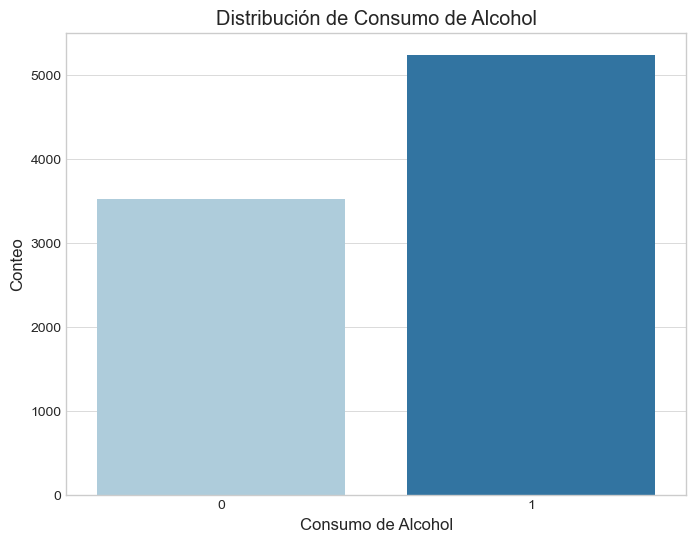

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Consumo de Alcohol', data=df, palette='Paired')
plt.title('Distribución de Consumo de Alcohol')
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Conteo')
plt.show()

# DIETA

la distribucion en cuanto a la dieta resulta pareja. entre la opcion saludable, poco saludable y no saludable.

In [46]:
# Contar los valores únicos en la variable "Dieta"
conteo_diet = df['Dieta'].value_counts()

# Calcular el porcentaje
porcentaje_diet = (conteo_diet / len(df)) * 100

# Mostrar los resultados
print("Conteo de valores en la variable 'Dieta':")
print(conteo_diet)
print("\nPorcentaje de cada valor en la variable 'Dieta':")
print(porcentaje_diet)

Conteo de valores en la variable 'Dieta':
Saludable         2960
Promedio          2912
Poco Saludable    2891
Name: Dieta, dtype: int64

Porcentaje de cada valor en la variable 'Dieta':
Saludable        33.78
Promedio         33.23
Poco Saludable   32.99
Name: Dieta, dtype: float64


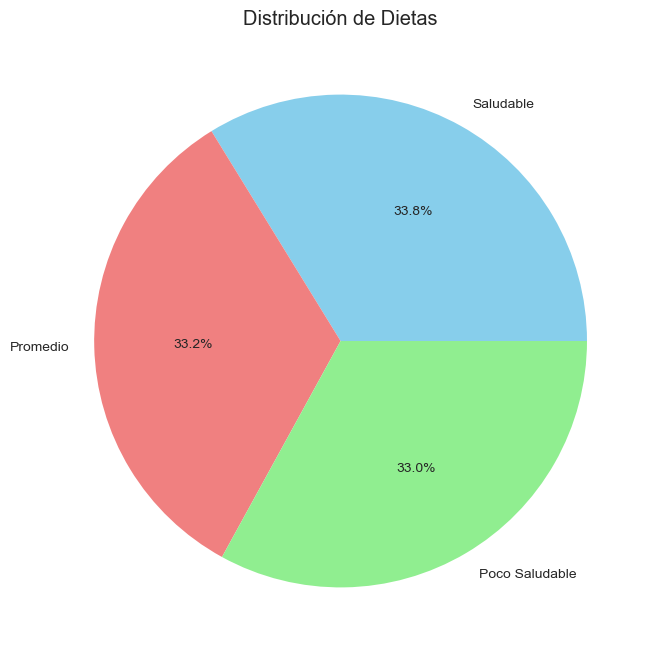

In [47]:
# Contar las ocurrencias de cada categoría en la variable "Dieta"
conteo_dieta = df['Dieta'].value_counts()

# Crear un gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(conteo_dieta, labels=conteo_dieta.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribución de Dietas')
plt.show()

# ANTECEDENTES CARDIACOS

la distribucion aparentemente no nos indica un patron relevante.

In [48]:
print(df["Antecedentes Cardiacos"].value_counts())

0    4418
1    4345
Name: Antecedentes Cardiacos, dtype: int64


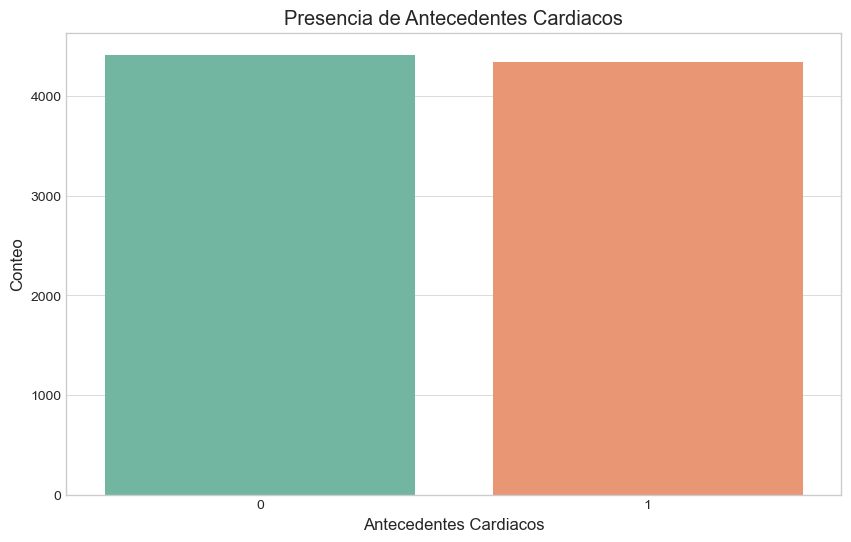

In [49]:
# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='Antecedentes Cardiacos', data=df, palette='Set2')
plt.title('Presencia de Antecedentes Cardiacos')
plt.xlabel('Antecedentes Cardiacos')
plt.ylabel('Conteo')
plt.show()

# NIVEL DE STRESS

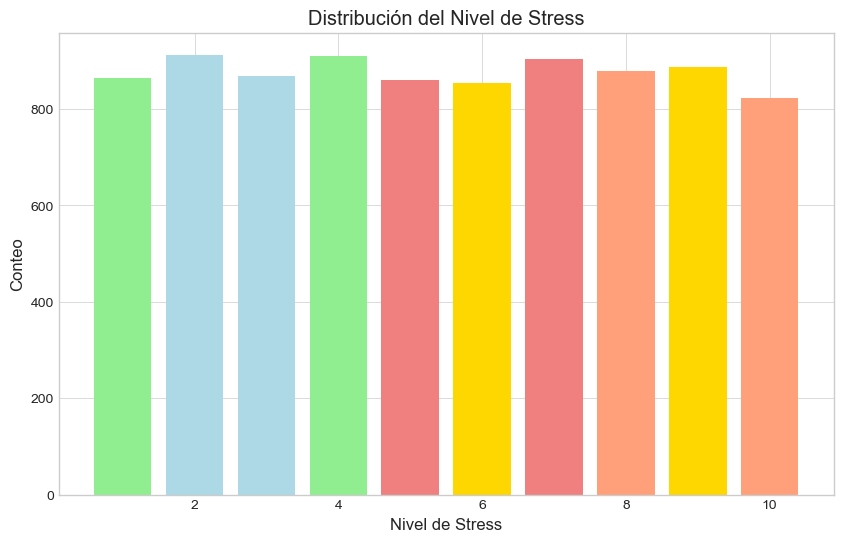

In [50]:

# Contar las ocurrencias de cada nivel de estrés
conteo_stress = df['Nivel de Stress'].value_counts()

# Colores personalizados para cada nivel de estrés
colores = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'lightsalmon']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_stress.index, conteo_stress, color=colores)
plt.title('Distribución del Nivel de Stress')
plt.xlabel('Nivel de Stress')
plt.ylabel('Conteo')
plt.show()

# BMI

 casi el 70 % se encuentran por arriba del valor normal de 25

In [51]:
# Filtrar personas con BMI mayor a 25
dfAltoBMI = df[df["BMI"] >= 25]

# Calcular la proporción
prop_alto_bmi = len(dfAltoBMI) / len(df)

# Mostrar los resultados
print(f"Cantidad de Personas con BMI Mayor a 25: {len(dfAltoBMI)}")
print(f"Proporción de Personas con BMI Mayor a 25: {prop_alto_bmi:.3f}")

Cantidad de Personas con BMI Mayor a 25: 5940
Proporción de Personas con BMI Mayor a 25: 0.678


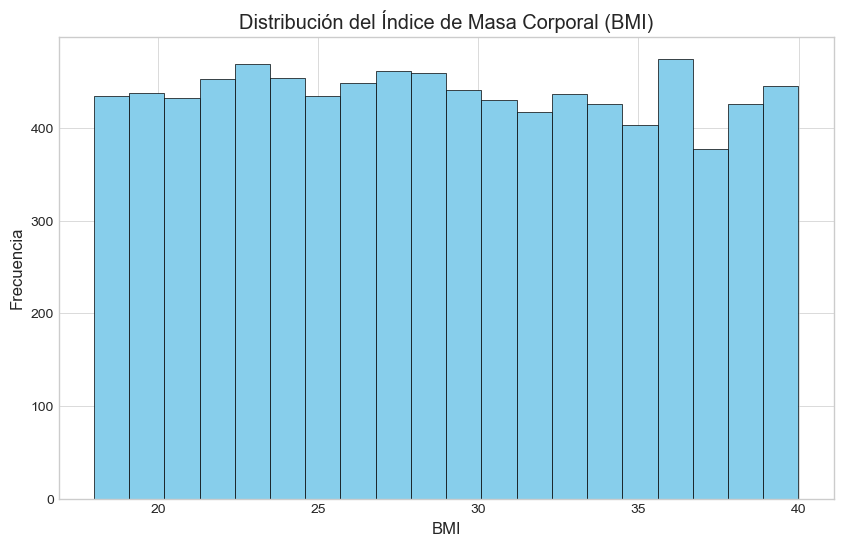

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Índice de Masa Corporal (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

# ACTIVIDAD FISICA/SEMANA

In [53]:
umbral = 3.5

# Filtrar las personas por encima del umbral
exercise_above_umbral = df[df['Actividad Fisica/Semana'] > umbral]

# Calcular la cantidad y porcentaje de personas por encima del umbral
cantidad_above_umbral = len(exercise_above_umbral)
porcentaje_above_umbral = (cantidad_above_umbral / len(df)) * 100

print(f"Cantidad de Personas con más de {umbral} horas de ejercicio por semana: {cantidad_above_umbral}")
print(f"Porcentaje de Personas con más de {umbral} horas de ejercicio por semana: {porcentaje_above_umbral:.2f}%")

Cantidad de Personas con más de 3.5 horas de ejercicio por semana: 4325
Porcentaje de Personas con más de 3.5 horas de ejercicio por semana: 49.36%


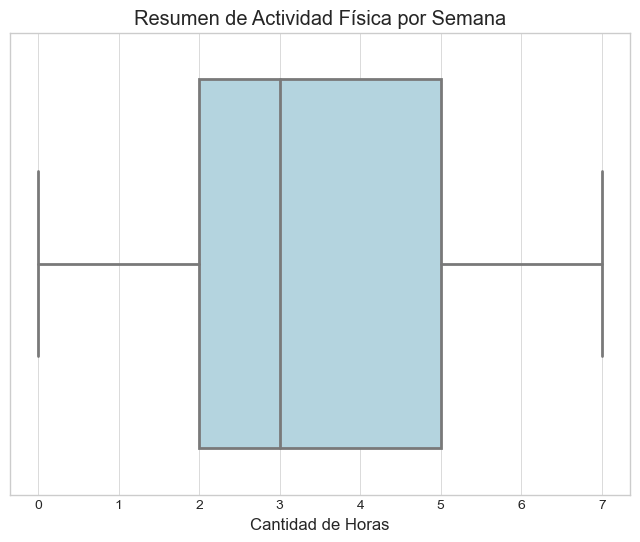

In [54]:
# Crear un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Actividad Fisica/Semana'], color='lightblue')
plt.title('Resumen de Actividad Física por Semana')
plt.xlabel('Cantidad de Horas')
plt.show()


# HORA DE DESCANSO

In [55]:
# Total de personas en el DataFrame
total_personas = len(df)

# Filtrar personas con menos de 8 horas de sueño
dfMenos8Horas = df[df["Horas de descanso"] < 8]

# Filtrar personas con menos de 6 horas de sueño
dfMenos6Horas = df[df["Horas de descanso"] < 6]

# Calcular proporciones
prop_menos8_horas = len(dfMenos8Horas) / total_personas
prop_menos6_horas = len(dfMenos6Horas) / total_personas

# Mostrar los resultados
print(f"Cantidad de Personas con Menos de 8 Horas de Sueño: {len(dfMenos8Horas)}")
print(f"Proporción de Personas con Menos de 8 Horas de Sueño: {prop_menos8_horas:.3f}")

print(f"Cantidad de Personas con Menos de 6 Horas de Sueño: {len(dfMenos6Horas)}")
print(f"Proporción de Personas con Menos de 6 Horas de Sueño: {prop_menos6_horas:.3f}")

Cantidad de Personas con Menos de 8 Horas de Sueño: 4990
Proporción de Personas con Menos de 8 Horas de Sueño: 0.569
Cantidad de Personas con Menos de 6 Horas de Sueño: 2444
Proporción de Personas con Menos de 6 Horas de Sueño: 0.279


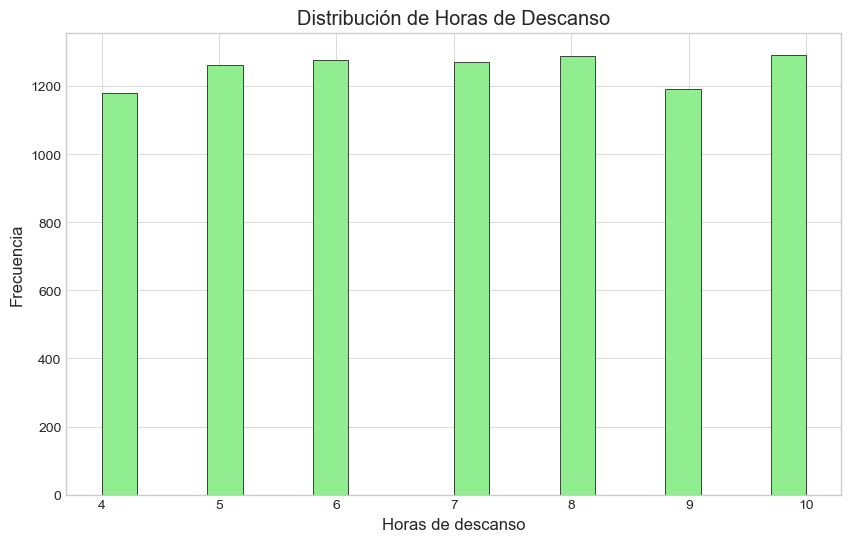

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['Horas de descanso'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de Horas de Descanso')
plt.xlabel('Horas de descanso')
plt.ylabel('Frecuencia')
plt.show()

# PAIS

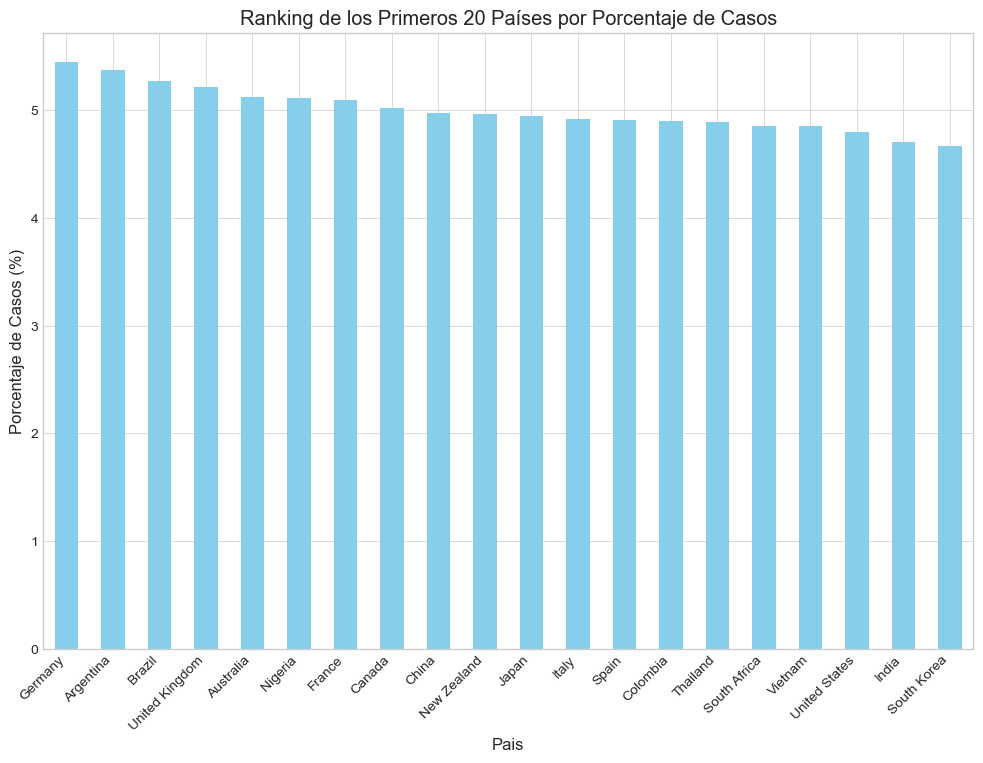

In [57]:
# los primeros 20 paises con mas casos
# Contar la cantidad de casos por país
conteo_paises = df['Pais'].value_counts()

# Calcular el porcentaje en relación con el total de casos
porcentaje_paises = (conteo_paises / len(df)) * 100

# Seleccionar los primeros 20 países
top_20_paises = porcentaje_paises.head(20)

# Crear un histograma
plt.figure(figsize=(12, 8))
top_20_paises.plot(kind='bar', color='skyblue')
plt.title('Ranking de los Primeros 20 Países por Porcentaje de Casos')
plt.xlabel('Pais')
plt.ylabel('Porcentaje de Casos (%)')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los países para mejor legibilidad
plt.show()


# CONTINENTE

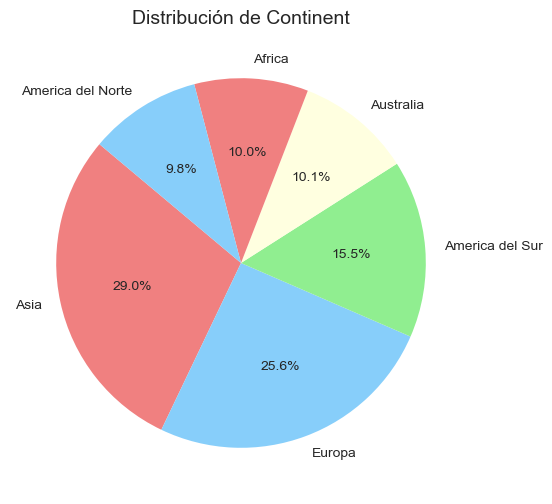

In [58]:
# Supongamos que 'Continent' es el nombre de tu variable y 'df' es tu DataFrame
plt.figure(figsize=(6, 6))

# Contar la frecuencia de cada categoría en 'Continent'
counts = df['Continente'].value_counts()

# Etiquetas para las categorías
labels = counts.index

# Colores para las porciones del gráfico
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']

# Crear el gráfico de torta
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Personalizar el gráfico
plt.title('Distribución de Continent', fontsize=14)

# Centrar el gráfico en la pantalla (Opción alternativa)
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()

# Mostrar el gráfico
plt.show()

## HEMISFERIO

en el hemisferio norte se presentan mayor cantidad de casos.

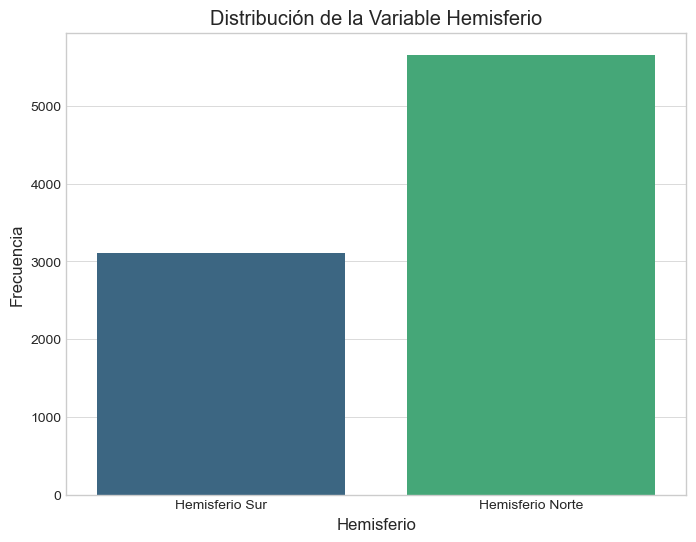

In [59]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Hemisferio', data=df, palette='viridis')
plt.title('Distribución de la Variable Hemisferio')
plt.xlabel('Hemisferio')
plt.ylabel('Frecuencia')
plt.show()

# RIESGO CARDIACO

In [60]:
# Filtrar casos con el valor "1" en la variable "Riesgo Cardiaco"
casos_con_1 = df[df['Riesgo Cardiaco'] == 1]

# Obtener la cantidad de casos con el valor "1"
cantidad_casos_con_1 = len(casos_con_1)

# Calcular el porcentaje en relación con el total
porcentaje_con_1 = (cantidad_casos_con_1 / len(df)) * 100

# Imprimir los resultados
print(f"Cantidad de casos con 'riesgo cardiago ': {cantidad_casos_con_1}")
print(f"Porcentaje de casos en relación con el total: {porcentaje_con_1:.2f}%")

Cantidad de casos con 'riesgo cardiago ': 3139
Porcentaje de casos en relación con el total: 35.82%


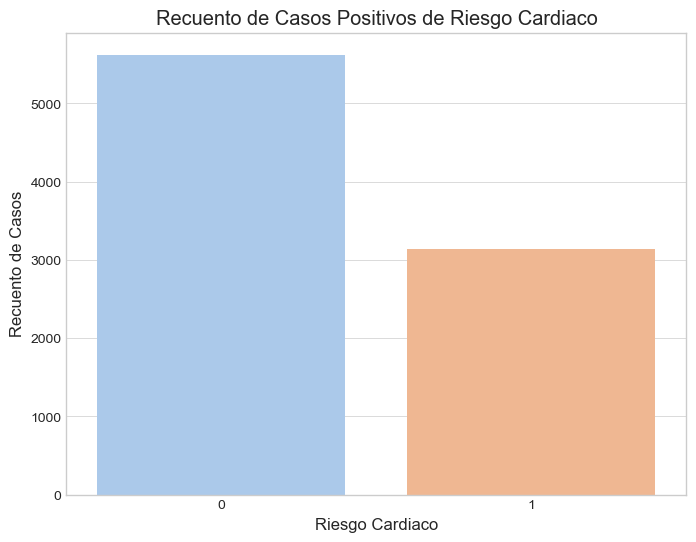

In [61]:
# Contar la cantidad de casos positivos y negativos
conteo_riesgo_cardiaco = df['Riesgo Cardiaco'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Riesgo Cardiaco', data=df, palette='pastel')
plt.title('Recuento de Casos Positivos de Riesgo Cardiaco')
plt.xlabel('Riesgo Cardiaco')
plt.ylabel('Recuento de Casos')
plt.show()

# De nuestra variable CondicionesPreexistentes se puede ver como se distribuye la poblacion de pacientes con condiciones preexistentes . vemos que mas del 80 % tiene 2 condiciones o mas

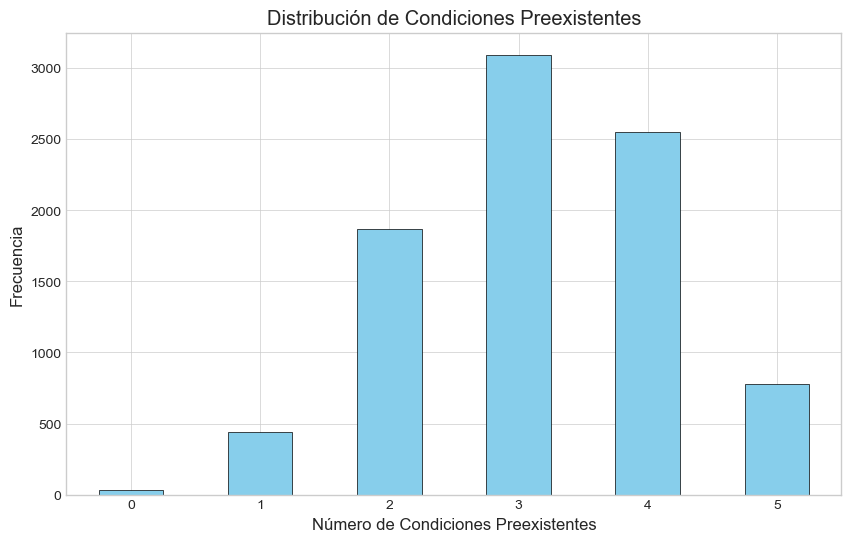

In [62]:
# Contar la frecuencia de cada valor en la nueva columna
frecuencia_condiciones = df['CondicionesPreexistentes'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_condiciones.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Condiciones Preexistentes')
plt.xlabel('Número de Condiciones Preexistentes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()



# Mostrar el gráfico (opcional)
plt.show()



# vamos a veri si a primera vista tenemos outliers en nuestras variables

a simple vista nuestras variables no presentan outliers. 

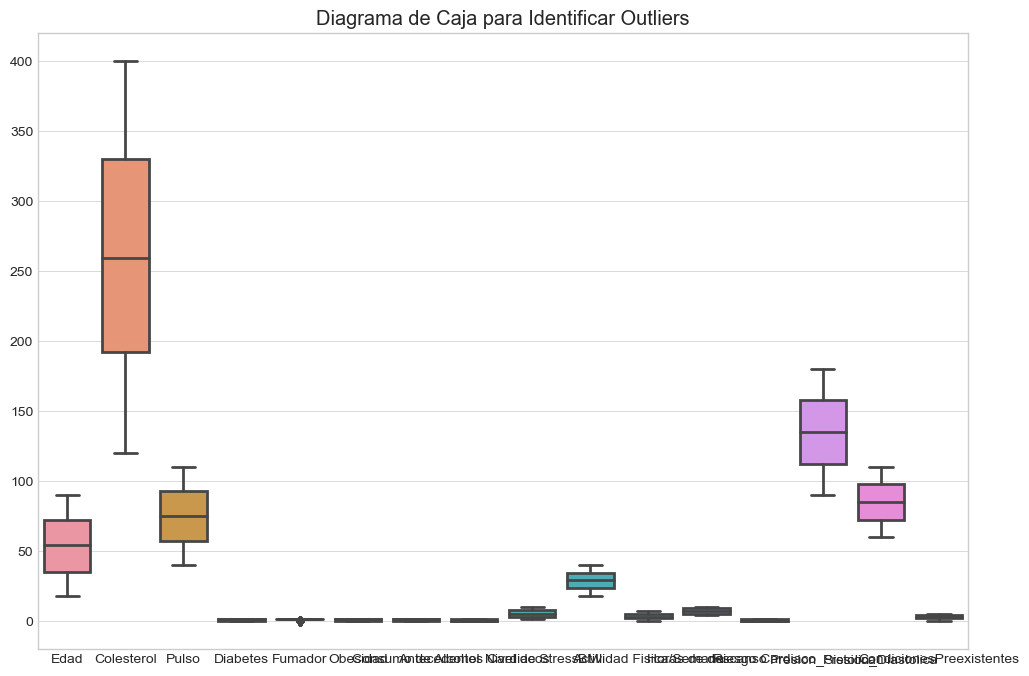

In [63]:
# Crear un boxplot para identificar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Diagrama de Caja para Identificar Outliers')
plt.show()


# vamos a realizar grafico relacionando 2 variables o mas.
(usamos librerias de Seaborn)

# Edad VS Sexo
observamos una distribucion pareja de las edades en relacion al sexo.

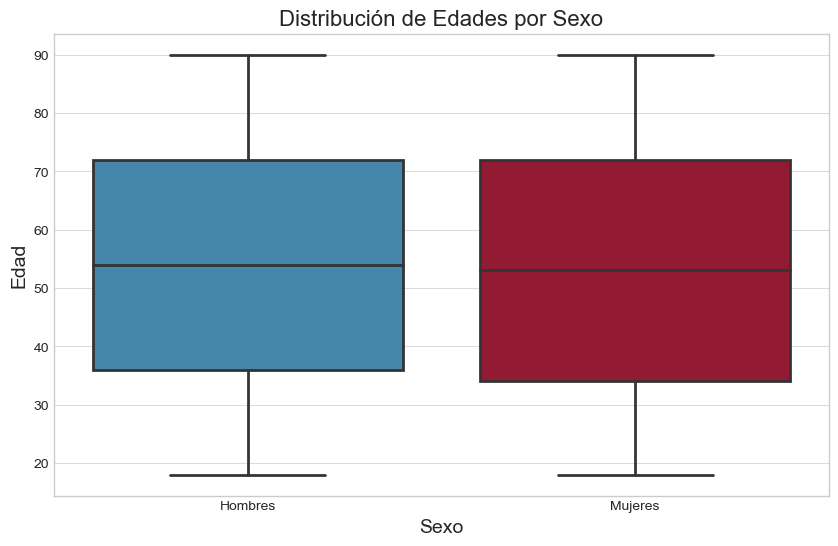

In [64]:

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Sexo', y='Edad', data=df)

# Personalizar el gráfico
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Edad', fontsize=14)
plt.title('Distribución de Edades por Sexo', fontsize=16)

# Mostrar el gráfico
plt.show()

# Diabetes VS  Edad x Sexo

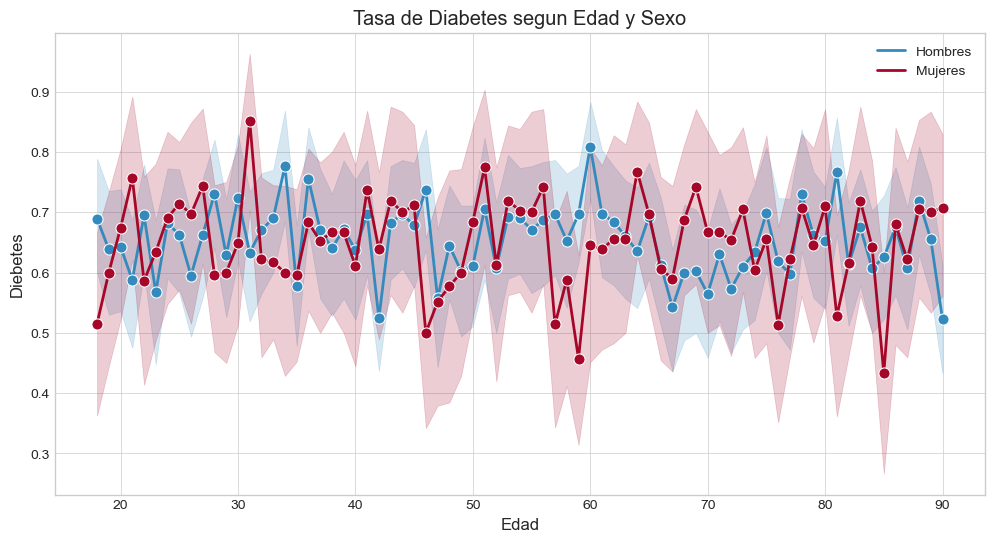

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df,
            x="Edad",
            y = "Diabetes",
            hue="Sexo",
            marker = "o",
            linestyle ="-",
            markersize = 8
            )

#personalizar el grafico
plt.xlabel("Edad")
plt.ylabel("Diebetes")
plt.title("Tasa de Diabetes segun Edad y Sexo")
plt.legend()

# Tercera entrega ----Estructurando un Proyecto de DS (parte I)-------
nuestro objetivo es predecir a travez de un puntaje a los pacientes que a partir de un cierto puntaje tiene altas chances de sufrir un ataque cardiaco.

<Figure size 640x480 with 0 Axes>

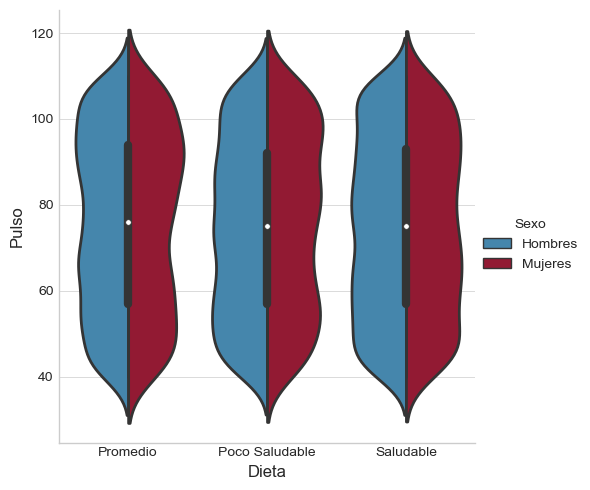

In [66]:
plt.figure()
sns.catplot(data = df,
           kind="violin",
           x="Dieta",
           y="Pulso",
           hue="Sexo",
           split=True)

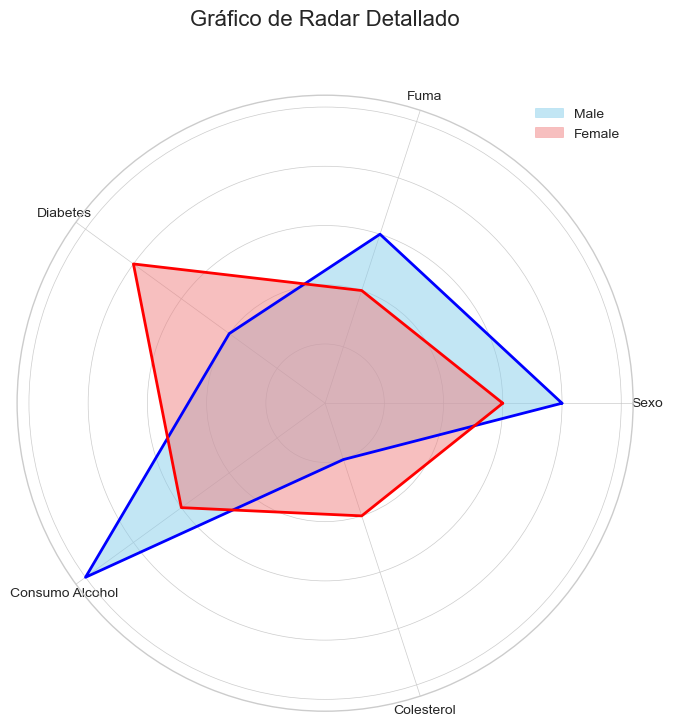

In [67]:
# Definir las categorías y sus valores para Male y Female
categories = ['Sexo', 'Fuma', 'Diabetes', 'Consumo Alcohol', 'Colesterol']
values_male = [4, 3, 2, 5, 1]
values_female = [3, 2, 4, 3, 2]

# Calcular el ángulo para cada eje
num_vars = len(categories)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()

# Hacer que el gráfico sea circular
values_male += values_male[:1]
values_female += values_female[:1]
angles += angles[:1]

# Inicializar el gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values_male, color='skyblue', alpha=0.5, label='Male')
ax.fill(angles, values_female, color='lightcoral', alpha=0.5, label='Female')

# Añadir líneas conectando los puntos
ax.plot(angles, values_male, color='blue', linewidth=2)
ax.plot(angles, values_female, color='red', linewidth=2)

# Etiquetar los ejes
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Añadir una etiqueta central
plt.title('Gráfico de Radar Detallado', fontsize=16, y=1.1)

# Añadir leyenda
ax.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

realizamos un grafico multivariado.. analizamos varias variables al mismo tiempo y lo comparamos en el mismo grafico con distintos sexos.. a si mple vista podemos ver que la diabetes y el colesterol afectaa mas a las mujeres que a los hombres y que el alcohol y el cigarrillo afecta mas a los hombres...


# Cuarta entrega --------Estructurando un Proyecto de DS (parte II)-------

de nuestro Df vamos a queres realizar un modelo predictivo que a travez de un sistema de puntos nos va a ayudar a determinar cuales son los pacientes que son los mas proclives a sufrir un ataque cardiaco. para eso creamos nuevos campos que nos van a ayudar a generar nuestro modelo nuestra Variable Target es "Riesgo Cardiaco"

en esta entrega acompañaremos con nuestro analisis algunos graficos univariados, bivariados y/o trivariados junto con algunos comentarios que nos va a ayudar a interpretarlos mejor.

In [68]:
#supervisado de clasificacin es una variable de tipo categorica
#estadistica descriptiva
#estadistica predictiva

In [69]:
df.head(5)

,Edad,Sexo,Colesterol,Presion Sanguinea,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Dieta,...,BMI,Actividad Fisica/Semana,Horas de descanso,Pais,Continente,Hemisferio,Riesgo Cardiaco,Presion_Sistolica,Presion_Diastolica,CondicionesPreexistentes
ID,,,,,,,,,,,,,,,,,,,,,
1,67,Hombres,208,158/88,72,0,1,0,0,Promedio,...,31.25,0,6,Argentina,America del Sur,Hemisferio Sur,0,158,88,1
2,21,Hombres,389,165/93,98,1,1,1,1,Poco Saludable,...,27.19,1,7,Canada,America del Norte,Hemisferio Norte,0,165,93,5
3,21,Mujeres,324,174/99,72,1,0,0,0,Saludable,...,28.18,4,4,France,Europa,Hemisferio Norte,0,174,99,2
4,84,Hombres,383,163/100,73,1,1,0,1,Promedio,...,36.46,3,4,Canada,America del Norte,Hemisferio Norte,0,163,100,4
5,66,Hombres,318,91/88,93,1,1,1,0,Poco Saludable,...,21.81,1,5,Thailand,Asia,Hemisferio Norte,0,91,88,4


In [70]:
df.describe()

,Edad,Colesterol,Pulso,Diabetes,Fumador,Obesidad,Consumo de Alcohol,Antecedentes Cardiacos,Nivel de Stress,BMI,Actividad Fisica/Semana,Horas de descanso,Riesgo Cardiaco,Presion_Sistolica,Presion_Diastolica,CondicionesPreexistentes
count,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00
mean,53.71,259.88,75.02,0.65,0.90,0.50,0.60,0.50,5.47,28.89,3.49,7.02,0.36,135.08,85.16,3.14
std,21.25,80.86,20.55,0.48,0.30,0.50,0.49,0.50,2.86,6.32,2.28,1.99,0.48,26.35,14.68,1.03
min,18.00,120.00,40.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.00,4.00,0.00,90.00,60.00,0.00
25%,35.00,192.00,57.00,0.00,1.00,0.00,0.00,0.00,3.00,23.42,2.00,5.00,0.00,112.00,72.00,2.00
50%,54.00,259.00,75.00,1.00,1.00,1.00,1.00,0.00,5.00,28.77,3.00,7.00,0.00,135.00,85.00,3.00
75%,72.00,330.00,93.00,1.00,1.00,1.00,1.00,1.00,8.00,34.32,5.00,9.00,1.00,158.00,98.00,4.00
max,90.00,400.00,110.00,1.00,1.00,1.00,1.00,1.00,10.00,40.00,7.00,10.00,1.00,180.00,110.00,5.00


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 1 to 8763
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Edad                      8763 non-null   int64  
 1   Sexo                      8763 non-null   object 
 2   Colesterol                8763 non-null   int64  
 3   Presion Sanguinea         8763 non-null   object 
 4   Pulso                     8763 non-null   int64  
 5   Diabetes                  8763 non-null   int64  
 6   Fumador                   8763 non-null   int64  
 7   Obesidad                  8763 non-null   int64  
 8   Consumo de Alcohol        8763 non-null   int64  
 9   Dieta                     8763 non-null   object 
 10  Antecedentes Cardiacos    8763 non-null   int64  
 11  Nivel de Stress           8763 non-null   int64  
 12  BMI                       8763 non-null   float64
 13  Actividad Fisica/Semana   8763 non-null   int64  
 14  Horas de

In [72]:
#  Riesgo Cardiaco  
# genero una nueva variable numerica. sex num
#


In [73]:
# Mapear la variable Sexo a SexoNum
mapeo_sexo = {'Hombres': 3, 'Mujeres': 1}
df['SexoNum'] = df['Sexo'].map(mapeo_sexo)

# Mostrar el DataFrame resultante
#df.info()

In [74]:
# Crear la variable RiesgoInfarto como la suma de las variables mencionadas
variables_suma = ['SexoNum','Diabetes', 'Fumador', 'Antecedentes Cardiacos']
df['RiesgoInfarto'] = df[variables_suma].sum(axis=1)

# Mostrar el DataFrame resultan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 1 to 8763
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Edad                      8763 non-null   int64  
 1   Sexo                      8763 non-null   object 
 2   Colesterol                8763 non-null   int64  
 3   Presion Sanguinea         8763 non-null   object 
 4   Pulso                     8763 non-null   int64  
 5   Diabetes                  8763 non-null   int64  
 6   Fumador                   8763 non-null   int64  
 7   Obesidad                  8763 non-null   int64  
 8   Consumo de Alcohol        8763 non-null   int64  
 9   Dieta                     8763 non-null   object 
 10  Antecedentes Cardiacos    8763 non-null   int64  
 11  Nivel de Stress           8763 non-null   int64  
 12  BMI                       8763 non-null   float64
 13  Actividad Fisica/Semana   8763 non-null   int64  
 14  Horas de

Text(0.5, 1.0, 'Relación entre GrLivArea y SalePrice')

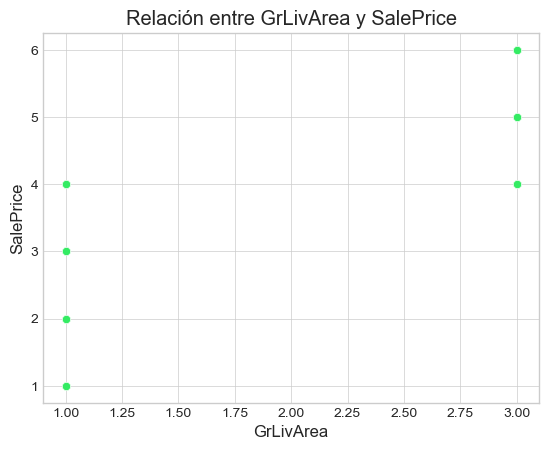

In [75]:
# Visualmente: 
plt.figure()
sns.scatterplot(data = df,
                x = 'SexoNum',
                y = 'RiesgoInfarto',
               color = '#34EB63')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Relación entre GrLivArea y SalePrice')

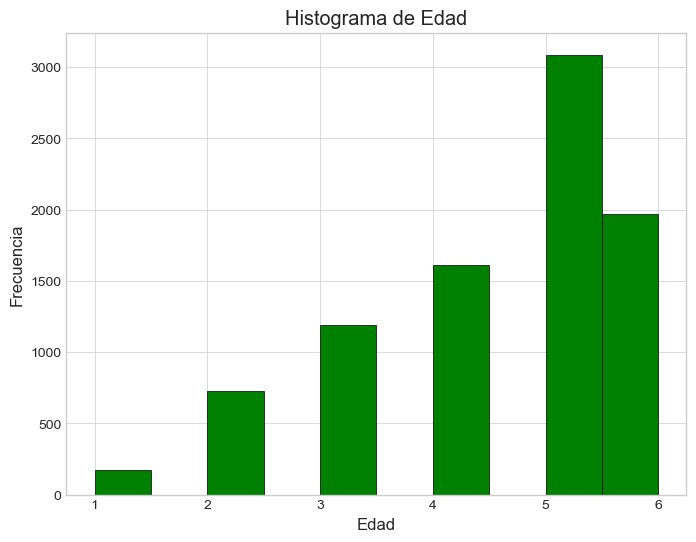

In [76]:
# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(df['RiesgoInfarto'], bins=10, color='green', edgecolor='black')
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# generamos una nueva variable que agrupe a las que mayor riesgo tienen.

In [78]:
# Supongamos que tienes un DataFrame llamado df que contiene las variables Diabetes, Fumador y Consumo de Alcohol
import pandas as pd

# Crear una nueva variable "Mayor Predisposición"
df['Mayor Predisposicion'] =(df['Diabetes'] | df['Fumador'] | df['Consumo de Alcohol']).astype(int)


# Suponiendo que ya has creado la columna "Mayor Predisposición" en tu DataFrame df
print(df['Mayor Predisposicion'])


ID
1       1
2       1
3       1
4       1
5       1
       ..
8759    1
8760    1
8761    1
8762    1
8763    1
Name: Mayor Predisposicion, Length: 8763, dtype: int32


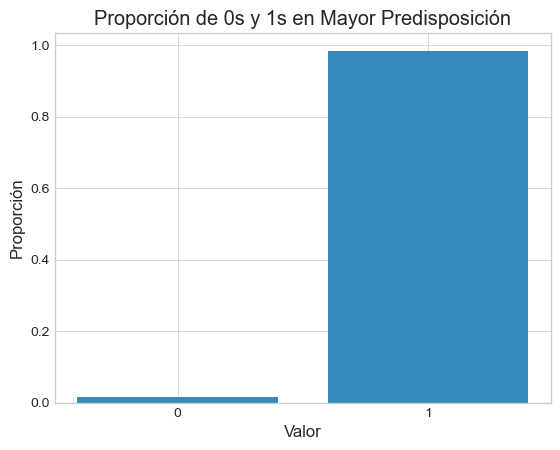

In [79]:

# Graficar la proporción en un gráfico de barras
plt.bar(df['Mayor Predisposicion'].value_counts().index, df['Mayor Predisposicion'].value_counts(normalize=True))
plt.xlabel('Valor')
plt.ylabel('Proporción')
plt.title('Proporción de 0s y 1s en Mayor Predisposición')
plt.xticks([0, 1])
plt.show()

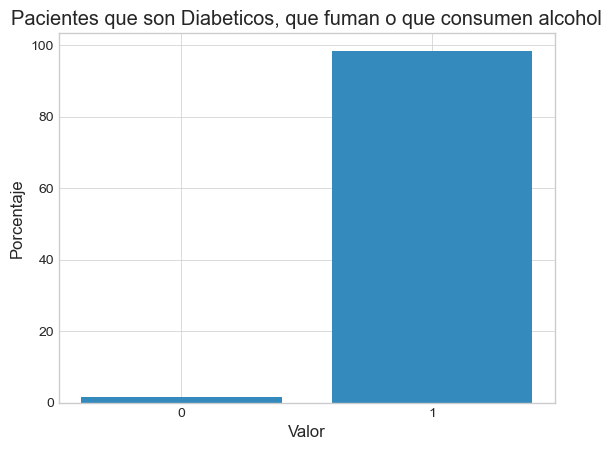

Porcentaje de 0s: 1.5405682985279012%
Porcentaje de 1s: 98.4594317014721%


In [80]:
# Crear la variable "Mayor Predisposición" con valores 0 o 1
df['Mayor Predisposicion'] = (df['Diabetes'] | df['Fumador'] | df['Consumo de Alcohol']).astype(int)

# Calcular el porcentaje de 0s y 1s en la columna 'Mayor Predisposición'
porcentaje_0 = (df['Mayor Predisposicion'] == 0).mean() * 100
porcentaje_1 = (df['Mayor Predisposicion'] == 1).mean() * 100

# Graficar el porcentaje en un gráfico de barras
plt.bar(['0', '1'], [porcentaje_0, porcentaje_1])
plt.xlabel('Valor')
plt.ylabel('Porcentaje')
plt.title('Pacientes que son Diabeticos, que fuman o que consumen alcohol')
plt.show()

# Imprimir los porcentajes
print(f'Porcentaje de 0s: {porcentaje_0}%')
print(f'Porcentaje de 1s: {porcentaje_1}%')

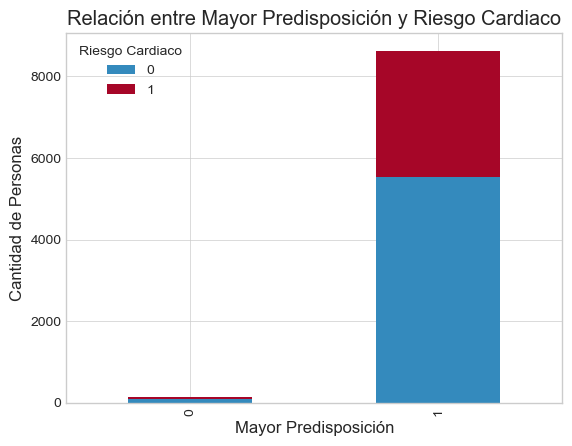

In [81]:

# Graficar la relación entre 'Mayor Predisposición' y 'Riesgo Cardiaco'
cross_table = pd.crosstab(df['Mayor Predisposicion'], df['Riesgo Cardiaco'])
cross_table.plot(kind='bar', stacked=True)
plt.xlabel('Mayor Predisposición')
plt.ylabel('Cantidad de Personas')
plt.title('Relación entre Mayor Predisposición y Riesgo Cardiaco')
plt.show()

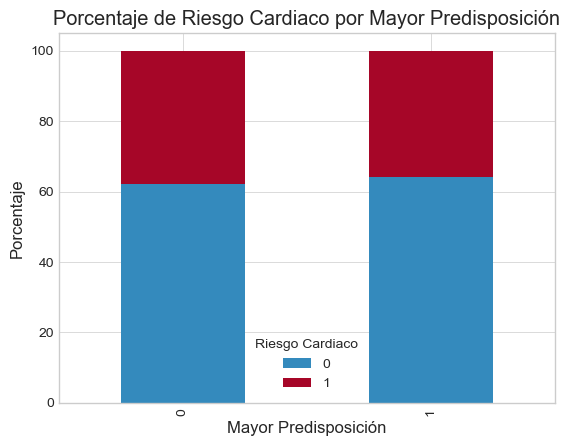

Porcentaje de Riesgo Cardiaco por Mayor Predisposición:
Mayor Predisposicion  Riesgo Cardiaco
0                     0                 62.22
                      1                 37.78
1                     0                 64.21
                      1                 35.79
Name: Riesgo Cardiaco, dtype: float64


In [82]:
# Calcular el porcentaje de 'Riesgo Cardiaco' para cada valor de 'Mayor Predisposición'
porcentaje_riesgo_cardiaco = df.groupby('Mayor Predisposicion')['Riesgo Cardiaco'].value_counts(normalize=True) * 100

# Graficar el porcentaje en un gráfico de barras
porcentaje_riesgo_cardiaco.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Mayor Predisposición')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Riesgo Cardiaco por Mayor Predisposición')
plt.show()

# Imprimir los porcentajes
print("Porcentaje de Riesgo Cardiaco por Mayor Predisposición:")
print(porcentaje_riesgo_cardiaco)